Data Loading:

It starts by loading a dataset containing EEG data and emotion labels. Each emotion is assigned a numerical value (0 for NEGATIVE, 1 for NEUTRAL, and 2 for POSITIVE).

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import signal
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import random

In [21]:
# Load the dataset
data = pd.read_csv('/dataset.csv')

In [22]:
data.head(3)

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.07,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.0,-162.0,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.55,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.6,-31.6,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.90,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.0,-148.0,281.00,POSITIVE


In [23]:
# Convert labels to numerical values
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
data['label'] = data['label'].map(label_mapping)

 Emotion Distribution:

The code creates a pie chart to visualize the distribution of emotions in the dataset. It helps understand how emotions are represented in the data.

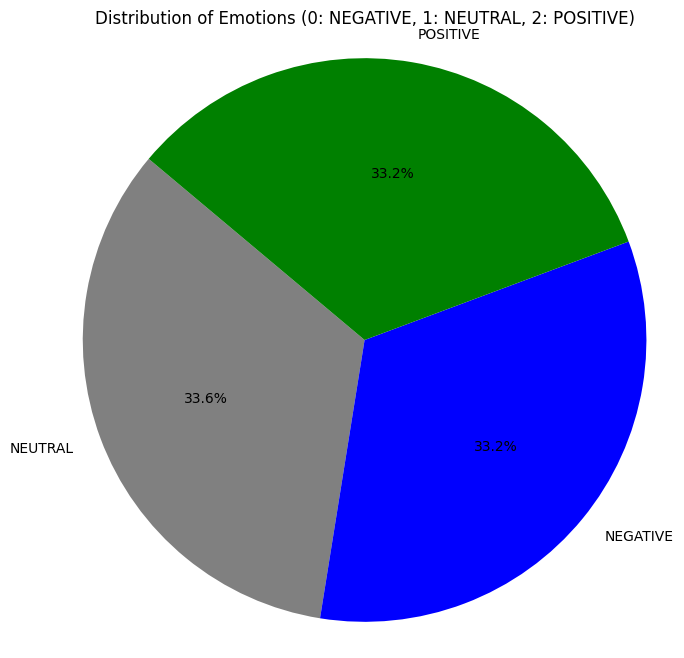

In [24]:
# Visualization using a Pie Chart

# Count the occurrences of each emotion
emotion_counts = data['label'].value_counts()

# Define emotional labels
emotional_labels = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}

# Map numerical labels to emotional labels
emotion_labels = [emotional_labels[label] for label in emotion_counts.index]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_labels, autopct='%1.1f%%', startangle=140, colors=['grey', 'blue', 'green'])
plt.title("Distribution of Emotions (0: NEGATIVE, 1: NEUTRAL, 2: POSITIVE)")
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.show()


 Time-Series Visualization:

The code displays a time-series plot of EEG data from a single sample. It shows how the EEG signal varies over time.

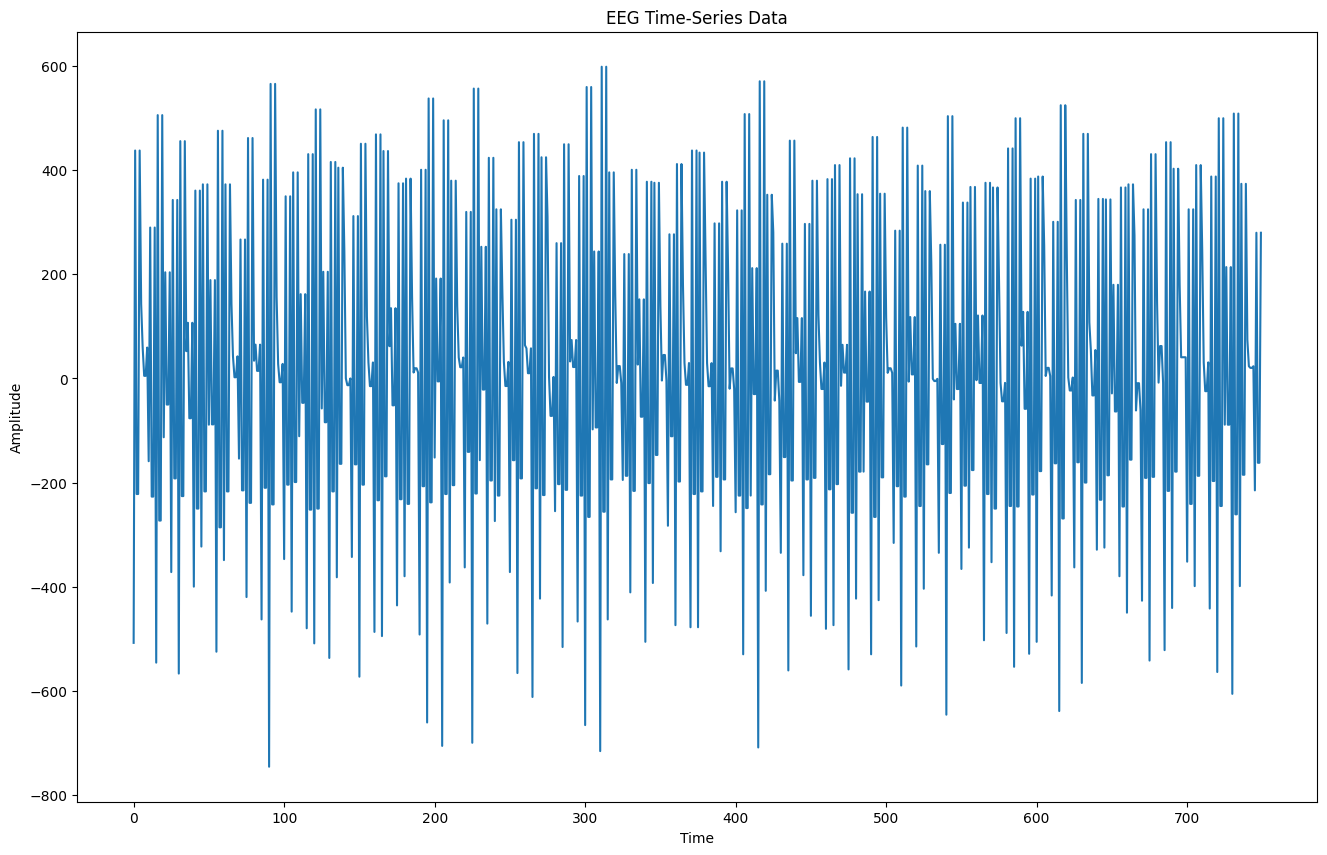

In [25]:
# Time-Series Visualization
sample = data.loc[0, 'fft_0_b':'fft_749_b'] #values from the 'fft_0_b' column to the 'fft_749_b
plt.figure(figsize=(16, 10)) #initializes a new figure with a specified size (16 inches in width and 10 inches in height)
plt.plot(range(len(sample)), sample)
plt.title("EEG Time-Series Data")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

 Preprocessing:

The EEG data is normalized using z-score normalization. Then, the data is split into training and testing sets for machine learning.



In statistical analysis and machine learning, normalization is a preprocessing technique used to scale the features of a dataset to a similar range. This is often done to ensure that all features contribute equally to the analysis, prevent features with large magnitudes from dominating those with smaller magnitudes, and to improve the convergence and performance of certain algorithms.

In [26]:
# Advanced Preprocessing

# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

The fit_transform method of the StandardScaler class is then applied to this selection. This means that each column (feature) is standardized independently, with the mean and standard deviation calculated separately for each column.

So, in summary, the standardization is occurring column-wise, with each feature being scaled independently of the others.

In [27]:
# Split the data into training and testing sets
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


 Neural Network Model:

An advanced neural network model is built and trained using TensorFlow/Keras. This model is designed to predict emotions based on EEG features.

In [28]:
# Build the advanced neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [29]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [30]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=70, batch_size=32, verbose=2)


Epoch 1/70
38/38 - 2s - loss: 1.2403 - accuracy: 0.7443 - val_loss: 0.4677 - val_accuracy: 0.9097 - 2s/epoch - 40ms/step
Epoch 2/70
38/38 - 0s - loss: 0.9822 - accuracy: 0.8391 - val_loss: 0.6626 - val_accuracy: 0.9231 - 496ms/epoch - 13ms/step
Epoch 3/70
38/38 - 0s - loss: 0.5160 - accuracy: 0.8977 - val_loss: 0.4429 - val_accuracy: 0.9197 - 466ms/epoch - 12ms/step
Epoch 4/70
38/38 - 0s - loss: 0.5035 - accuracy: 0.8885 - val_loss: 0.3226 - val_accuracy: 0.8997 - 443ms/epoch - 12ms/step
Epoch 5/70
38/38 - 0s - loss: 0.3404 - accuracy: 0.9061 - val_loss: 0.4260 - val_accuracy: 0.9097 - 493ms/epoch - 13ms/step
Epoch 6/70
38/38 - 0s - loss: 0.3844 - accuracy: 0.9053 - val_loss: 0.3707 - val_accuracy: 0.9030 - 419ms/epoch - 11ms/step
Epoch 7/70
38/38 - 0s - loss: 0.3580 - accuracy: 0.9120 - val_loss: 0.2257 - val_accuracy: 0.9197 - 416ms/epoch - 11ms/step
Epoch 8/70
38/38 - 0s - loss: 0.2319 - accuracy: 0.9170 - val_loss: 0.2243 - val_accuracy: 0.9197 - 424ms/epoch - 11ms/step
Epoch 9/70


Model Evaluation:

The code evaluates the model's performance using metrics like accuracy, and it generates a confusion matrix to visualize the model's predictions.

In [31]:
# Evaluate the model
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

model.save('nueral_network.h5')

Test Accuracy: 97.188%


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

# Load the saved model
loaded_model = tf.keras.models.load_model('nueral_network.h5')

# 'X_test' is the test dataset and 'y_test' is the corresponding labels
# Normalize the test data using the same scaler used during training
scaler = StandardScaler()
X_test_normalized = scaler.fit_transform(X_test)

# Predict outcomes using the loaded model
predictions = loaded_model.predict(X_test_normalized)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Evaluate the model on the test data
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))
print("\nClassification Report:\n", classification_report(y_test, predicted_labels))


20/20 [==============================] - 0s 5ms/step
Confusion Matrix:
 [[197   1   3]
 [  0 227   4]
 [  9   2 197]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       201
           1       0.99      0.98      0.98       231
           2       0.97      0.95      0.96       208

    accuracy                           0.97       640
   macro avg       0.97      0.97      0.97       640
weighted avg       0.97      0.97      0.97       640



In [33]:
# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

20/20 [==============================] - 0s 5ms/step


In [34]:
# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

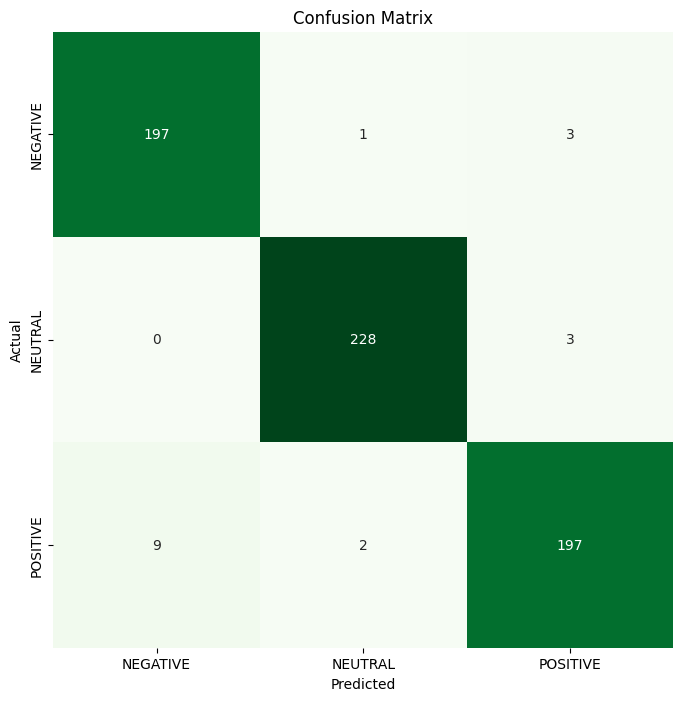

In [35]:
# Visualization of Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
# Print Classification Report
print("Classification Report:\n", clr)

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.96      0.98      0.97       201
     NEUTRAL       0.99      0.99      0.99       231
    POSITIVE       0.97      0.95      0.96       208

    accuracy                           0.97       640
   macro avg       0.97      0.97      0.97       640
weighted avg       0.97      0.97      0.97       640



 EEG Signal Visualization:

A random sample from the test data is selected, and the model predicts the associated emotion. The EEG signals for this sample are visualized for all available channels.

In [37]:
# Define the label mapping dictionary
label_mapping = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}


In [38]:
import random

# Define a dictionary for emotion labels
emotion_labels = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}

# Print the true and predicted emotion labels for 6 to 7 random samples
for i in range(6, 8):
    random_index = random.randint(0, len(X_test) - 1)
    sample_input = X_test.iloc[random_index].values.reshape(1, -1)
    true_label = y_test.iloc[random_index]
    true_emotion = emotion_labels.get(true_label, 'Unknown')  # Use .get() to avoid KeyError

    # Predict emotion for the sample input
    predicted_emotion = model.predict(sample_input)
    predicted_label = emotion_labels[np.argmax(predicted_emotion)]

    # Display the true and predicted emotion labels
    print(f"Sample {i}: Real Emotion Label: {true_emotion}, Predicted Emotion Label: {predicted_label}")


1/1 [==============================] - 0s 106ms/step
Sample 6: Real Emotion Label: NEUTRAL, Predicted Emotion Label: NEUTRAL
1/1 [==============================] - 0s 39ms/step
Sample 7: Real Emotion Label: POSITIVE, Predicted Emotion Label: NEGATIVE


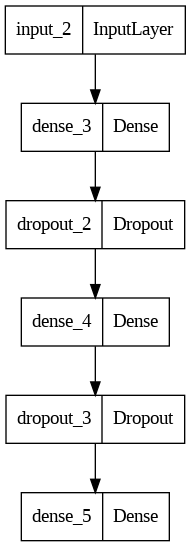

In [39]:
tf.keras.utils.plot_model(model)

## Summary:

This code explores EEG (electroencephalogram) data associated with human emotions. It covers data loading, preprocessing, and visualization, including a pie chart showing emotion distribution and time-series and spectral analysis of EEG signals. It also analyzes feature significance for emotion prediction and builds and evaluates a neural network model. The code aims to understand the connection between EEG data and emotions, ultimately providing a trained model for emotion
prediction.

## Key Takeaways:

EEG data reveals emotional patterns.
Neural network model predicts emotions.
Code provides a holistic approach to EEG emotion analysis.
This code serves as a valuable resource for EEG-based emotion research and prediction.

Overall, this code provides a comprehensive workflow for analyzing EEG data related to emotions. It covers data exploration, visualization, feature analysis, preprocessing, machine learning model building, and model evaluation. The key takeaway is a deeper understanding of the relationship between EEG signals and human emotions, along with a trained model for emotion prediction.
